In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('Advertising Budget and Sales.csv', encoding='latin1')
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [14]:
df.describe(include='all')

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [16]:
df.shape

(200, 5)

In [17]:
df.ndim

2

In [18]:
df.size

1000

In [19]:
pd.DataFrame(df.isnull().sum(),columns =["Count of Null Values"]).T

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Count of Null Values,0,0,0,0,0


In [21]:
a = df["Newspaper Ad Budget ($)"]
b = df["TV Ad Budget ($)"]

<Axes: xlabel='Newspaper Ad Budget ($)', ylabel='TV Ad Budget ($)'>

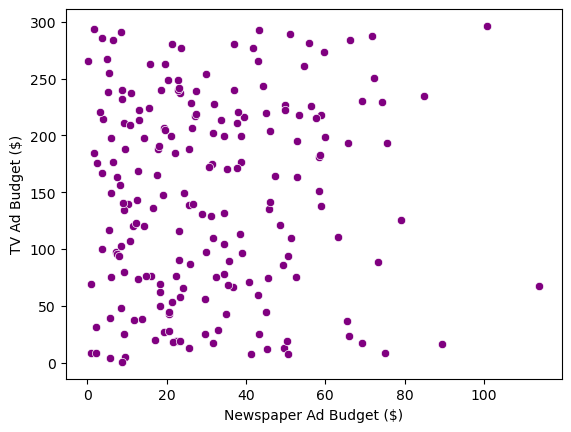

In [22]:
sns.scatterplot(x=a,y=b,color='purple')

<Axes: xlabel='Radio Ad Budget ($)', ylabel='Density'>

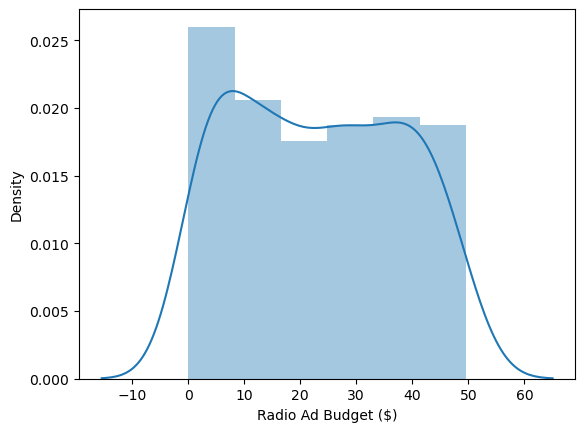

In [23]:
sns.distplot(df['Radio Ad Budget ($)'])

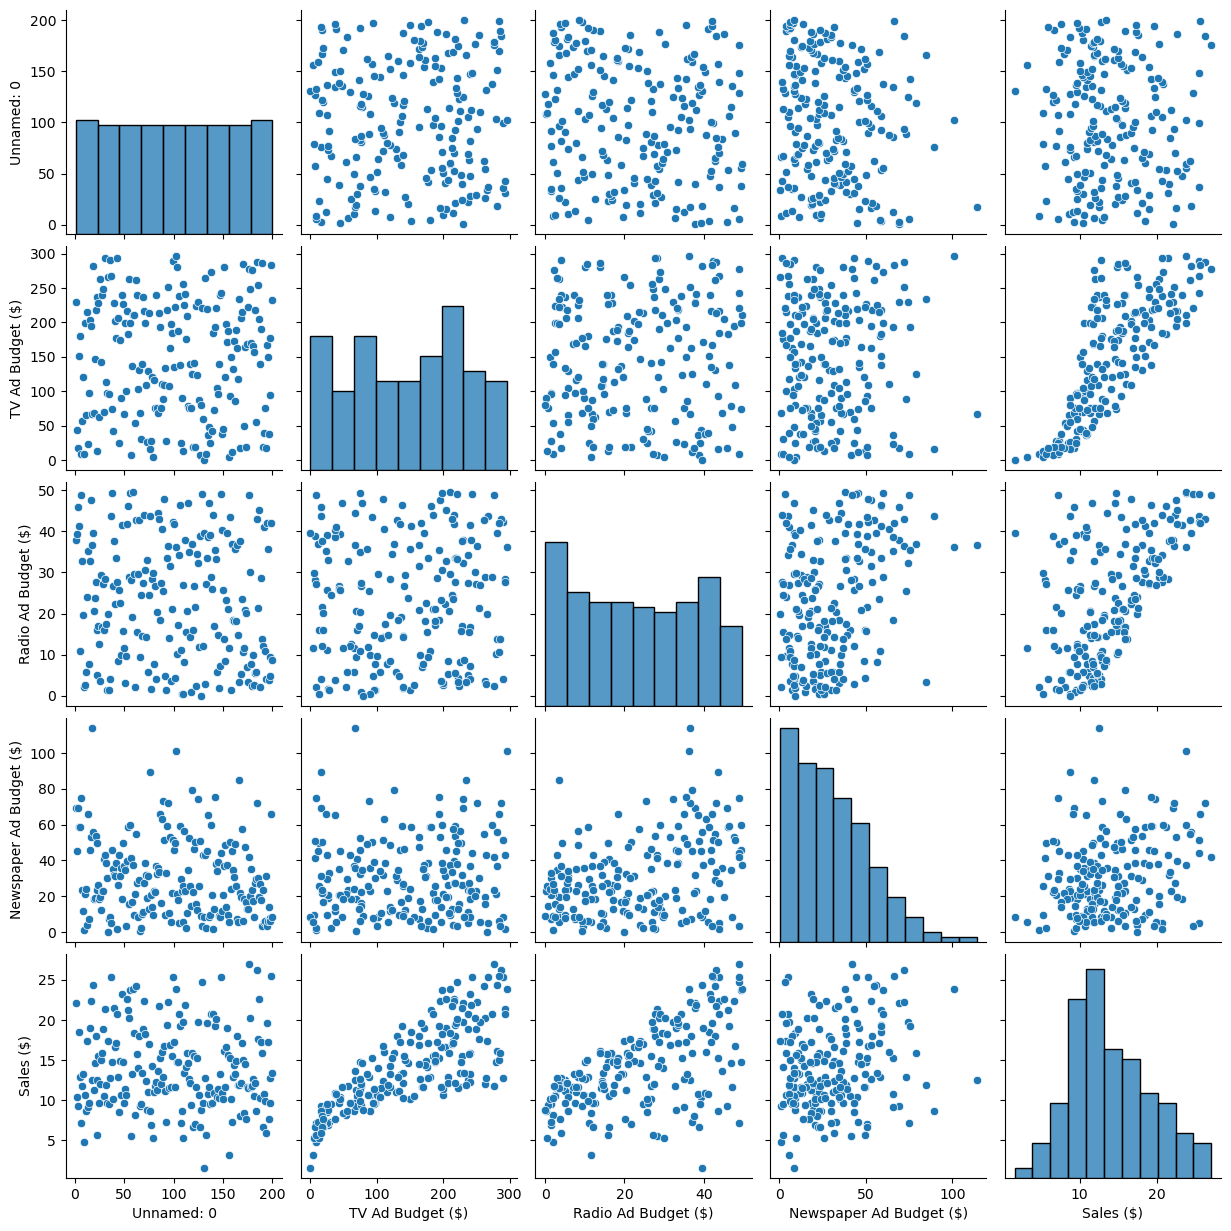

In [25]:
sns.pairplot(df)

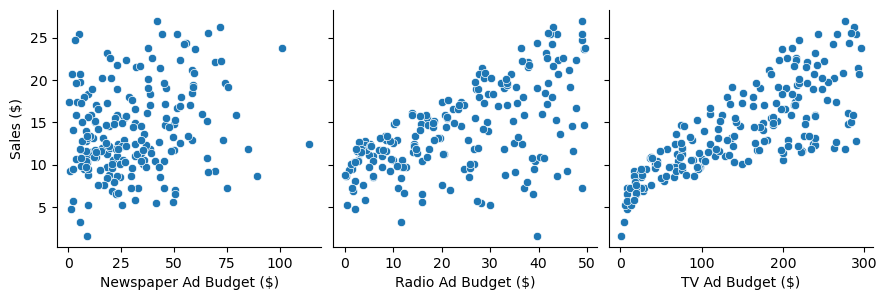

In [27]:
sns.pairplot(df,x_vars=['Newspaper Ad Budget ($)','Radio Ad Budget ($)','TV Ad Budget ($)'],y_vars=['Sales ($)'],height=3,aspect=1)
plt.show()

In [28]:
#linear Regression
X = df[['TV Ad Budget ($)']]
Y = df['Sales ($)']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.2,random_state=48)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [59]:
lr.intercept_

7.792857203429841

In [60]:
lr.coef_

array([0.04264633])

In [61]:
print("The LR model is: Y = ",lr.intercept_, "+", lr.coef_, "TV Ad Budget ($)")

The LR model is: Y =  7.792857203429841 + [0.04264633] TV Ad Budget ($)


In [62]:
lr.score(X_train,Y_train)

0.5516999946450702

In [63]:
Y_pred =lr.predict(X_test)

In [64]:
Y_pred

array([16.03212747, 17.79342075, 12.60762746,  8.02314737, 15.34125698,
       10.33457826, 15.34125698,  8.15108635,  8.52637402, 19.46515674,
        8.93577875, 12.47542384, 11.95087403,  8.15961561, 14.97449857,
       14.76553157, 18.61649485, 13.88701725, 20.05794068,  9.42194687,
       17.19637218, 11.00412558, 13.04261998, 19.59309572, 18.93634229,
        9.41341761, 18.03224017, 15.67816296, 16.28374079, 12.37307266,
        8.85901536, 10.61177938, 10.92309756, 20.14749796, 13.72922584,
        8.6287252 , 15.58007641, 14.75700231, 17.11107952, 17.99812311,
       13.74201974, 15.67816296, 12.93173954, 14.47127192, 16.4287383 ,
       12.9530627 , 18.4928205 , 16.97887591, 13.81878313, 17.51621962,
       13.31129184, 17.10681489, 15.26022896,  8.51358012, 16.73152722,
       13.7761368 , 15.09817292, 19.88735537, 10.44972334, 11.79734725,
        8.55622645,  8.88460316, 16.94902348,  8.96563118, 14.07466108,
        8.16388024,  8.59460814, 12.51380554, 11.64808511, 18.10

In [65]:
diff = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})

In [66]:
diff.head(10)

,Actual,Predicted
85,15.2,16.032127
165,11.9,17.793421
31,11.9,12.607627
78,5.3,8.023147
41,17.1,15.341257
129,9.7,10.334578
197,12.8,15.341257
132,5.7,8.151086
192,5.9,8.526374
137,20.8,19.465157


In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [68]:
R2 = r2_score(Y_test,Y_pred)
mae = metrics.mean_absolute_error(Y_test,Y_pred)
mse = metrics.mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))

In [69]:
print('Accuracy = ',R2.round(2)*100,'%')
print('mae =',mae.round(2))
print('mse =',mse.round(2))
print('rmse =',rmse.round(2))

Accuracy =  62.0 %
mae = 2.61
mse = 10.82
rmse = 3.29


<Axes: xlabel='Sales ($)'>

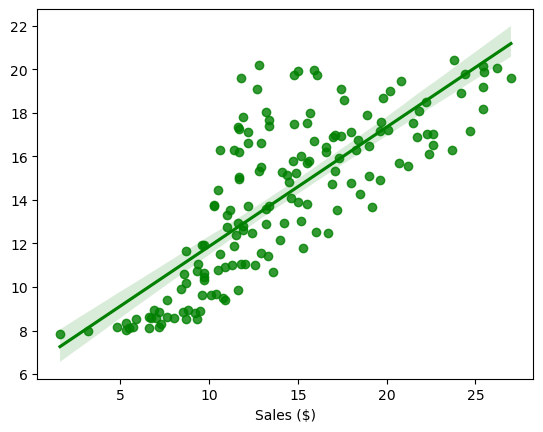

In [70]:
sns.regplot(x=Y_test, y=Y_pred,color='green')